## Self learning

This Notebook answeres the question:

What is the relationship between years of professional coding experience and total compensation across the top 10 different countries?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime


df_schema= pd.read_csv('../data/raw/stack-overflow-developer-survey-2024/survey_results_schema.csv')
df_public = pd.read_csv('../data/raw/stack-overflow-developer-survey-2024/survey_results_public.csv')

df_schema.head()

,qid,qname,question,force_resp,type,selector
0,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
1,QID127,Age,What is your age?*,True,MC,SAVR
2,QID296,Employment,Which of the following best describes your cur...,True,MC,MAVR
3,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
4,QID341,Check,Just checking to make sure you are paying atte...,True,MC,SAVR


In [2]:
df_public.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN



---

## Data Understanding

The most important variables are:

- **EdLevel**: The developer's education level.
- **LearnCode**: How the developer learned to code.
- **LearnCodeOnline**: Whether the developer learned to code through online resources.
- **TechDoc**: The usage of technical documentation as a learning resource.

---


In [3]:
# let's create the dataframe we need from df_public
df_q3 = df_public[[ 'YearsCodePro', 'Country', 'CompTotal']].copy()

df_q3.head(20)

,YearsCodePro,Country,CompTotal
0,NaN,United States of America,NaN
1,17,United Kingdom of Great Britain and Northern I...,NaN
2,27,United Kingdom of Great Britain and Northern I...,NaN
3,NaN,Canada,NaN
4,NaN,Norway,NaN
5,NaN,United States of America,NaN
6,7,United States of America,NaN
7,NaN,Uzbekistan,NaN
8,NaN,United Kingdom of Great Britain and Northern I...,NaN
9,11,Serbia,NaN


In [4]:
df_q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearsCodePro  51610 non-null  object 
 1   Country       58930 non-null  object 
 2   CompTotal     33740 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.5+ MB



---

## Data Preparation

Since salary is the target variable, we have two options for handling NaN values in the `CompTotal` column. The first option is to fill the NaN values with the mean of the available data. However, this approach is problematic because we only have half of the values provided. Therefore, the second option is to drop the NaN values from `CompTotal`.

---


In [5]:
df_q3 = df_q3.dropna(subset=['CompTotal'])

In [6]:
df_q3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33740 entries, 72 to 65431
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearsCodePro  33617 non-null  object 
 1   Country       33740 non-null  object 
 2   CompTotal     33740 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.0+ MB


The YearsCodePro column should be in int64/32 format. Upon closer analysis, we notice that if a user learned coding for less than a year, the response was recorded as "less than a year." We can convert this to 0, indicating that the user has not coded for a full year.

In [7]:
df_q3['YearsCodePro'] = df_q3['YearsCodePro'].replace('Less than 1 year', 0)

# Convert the column to numeric 
df_q3['YearsCodePro'] = pd.to_numeric(df_q3['YearsCodePro'], errors='coerce')

df_q3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33740 entries, 72 to 65431
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearsCodePro  33597 non-null  float64
 1   Country       33740 non-null  object 
 2   CompTotal     33740 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.0+ MB


Now that there are only 133 values missing for YearsCodePro we can compute the mean of that column and fill the NaN values with it. 

In [8]:

# Calculate the mean, ignoring NaN values
mean_value = df_q3['YearsCodePro'].mean()

# Fill NaN values with the mean
df_q3['YearsCodePro'] = df_q3['YearsCodePro'].fillna(mean_value)

df_q3.to_csv('../data/processed/df_q3.csv', index=False)
df_q3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33740 entries, 72 to 65431
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearsCodePro  33740 non-null  float64
 1   Country       33740 non-null  object 
 2   CompTotal     33740 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.0+ MB


Now we should transfer the categorical values of country into numerical. Since the Country column isn't in an inherent order we should use One-Hot Encoding.Also we would only like to see the top 5 countries 

In [9]:
# Step 1: Identify the top 10 countries based on the count
top_countries = df_q3['Country'].value_counts().nlargest(11).index

# Step 2: Filter the DataFrame to keep only the top 10 countries
df_q3 = df_q3[df_q3['Country'].isin(top_countries)]

# One-hot encode the 'Country' column
df_q3_encoded = pd.get_dummies(df_q3, columns=['Country'], drop_first=True)


Now, let's examine the plausibility of the ranges for YearsCodePro and CompTotal.

In [10]:
print('YearsCodePro Max:', df_q3_encoded['YearsCodePro'].max())
print('YearsCodePro Min:', df_q3_encoded['YearsCodePro'].min())
print('CompTotal Max:',df_q3_encoded['CompTotal'].max())
print('CompTotal Min:',df_q3_encoded['CompTotal'].min())

YearsCodePro Max: 50.0
YearsCodePro Min: 0.0
CompTotal Max: 1111111111111111.0
CompTotal Min: 0.0


We can see that YearsCodePro appears to be reasonable, but the CompTotal values exceed what would be considered a reasonable salary. Therefore, we should cap CompTotal at a maximum value of 250,000. Additionally, if the salary is below 1,000, we can hardly classify the participant as a developer for a living.

In [11]:
df_q3_encoded['CompTotal'] = df_q3_encoded['CompTotal'].clip(upper=250000)
# Drop rows where CompTotal is 0
df_q3_encoded = df_q3_encoded[df_q3_encoded['CompTotal'] > 1000]

df_q3_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21098 entries, 385 to 65408
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   YearsCodePro                                                  21098 non-null  float64
 1   CompTotal                                                     21098 non-null  float64
 2   Country_Canada                                                21098 non-null  bool   
 3   Country_France                                                21098 non-null  bool   
 4   Country_Germany                                               21098 non-null  bool   
 5   Country_India                                                 21098 non-null  bool   
 6   Country_Netherlands                                           21098 non-null  bool   
 7   Country_Poland                                                21098 no

In [12]:
# Display the result
print('YearsCodePro Max:', df_q3_encoded['YearsCodePro'].max())
print('YearsCodePro Min:', df_q3_encoded['YearsCodePro'].min())
print('CompTotal Max:',df_q3_encoded['CompTotal'].max())
print('CompTotal Min:',df_q3_encoded['CompTotal'].min())


YearsCodePro Max: 50.0
YearsCodePro Min: 0.0
CompTotal Max: 250000.0
CompTotal Min: 1100.0



---

## Model Selection

Given that our target variable is numerical, linear regression or polynomial regression would be the most suitable models. A scatter plot can help analyze the relationship and determine which model to use.

---


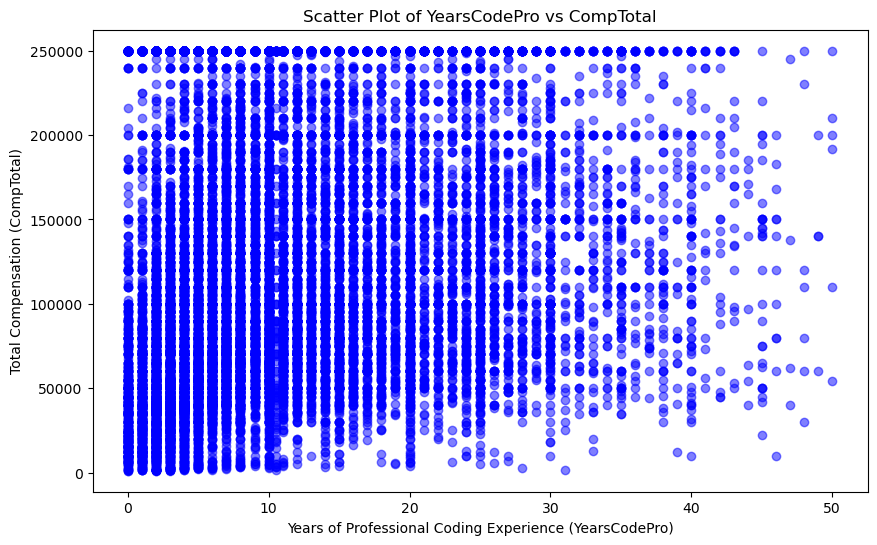

In [13]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_q3_encoded['YearsCodePro'], df_q3_encoded['CompTotal'], alpha=0.5, c='b')

# Add labels and title
plt.xlabel('Years of Professional Coding Experience (YearsCodePro)')
plt.ylabel('Total Compensation (CompTotal)')
plt.title('Scatter Plot of YearsCodePro vs CompTotal')

# Show the plot
plt.show()

It is not clear if we can use a linear regression or a polynomial, so letst try a log transformation and then analyze the results again.

Text(0.5, 1.0, 'Scatter Plot of YearsCodePro vs CompTotal')

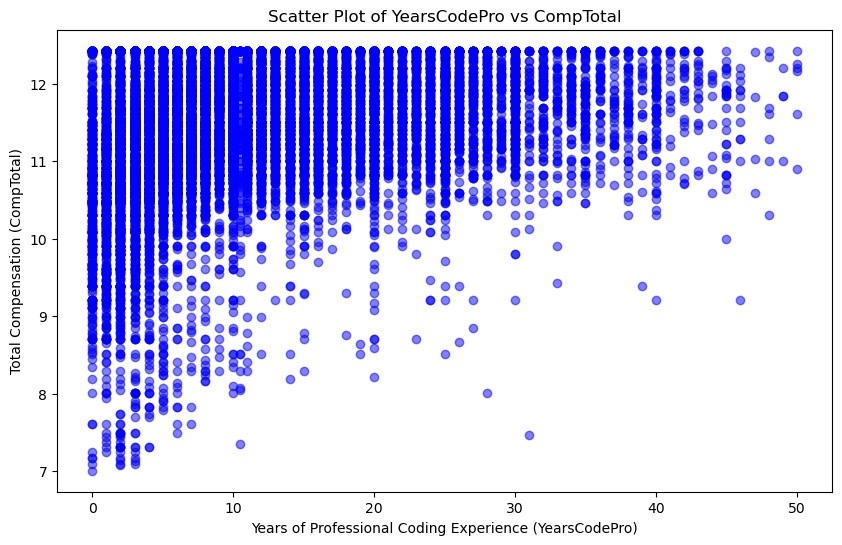

In [14]:
# Log transformation of the target variable
df_q3_encoded['CompTotal_log'] = np.log1p(df_q3_encoded['CompTotal'])

# Import necessary libraries
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_q3_encoded['YearsCodePro'], df_q3_encoded['CompTotal_log'], alpha=0.5, c='b')

# Add labels and title
plt.xlabel('Years of Professional Coding Experience (YearsCodePro)')
plt.ylabel('Total Compensation (CompTotal)')
plt.title('Scatter Plot of YearsCodePro vs CompTotal')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Features and target variable
X = df_q3_encoded.drop(columns=['CompTotal', 'CompTotal_log'])  # Drop original target
y = df_q3_encoded['CompTotal_log']  # Use log-transformed target

# Create polynomial features (degree 2 for quadratic features)
poly = PolynomialFeatures(degree=3, include_bias=False)  # You can experiment with different degrees
X_poly = poly.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge regression model (with polynomial features)
ridge_model = Ridge(alpha=1.0)  # You can experiment with the alpha parameter
ridge_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = ridge_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared score:", r2)


# OLS regression to get p-values
X_ols = sm.add_constant(X_train_scaled)  # Adds a constant term to the predictor
ols_model = sm.OLS(y_train, X_ols)
ols_results = ols_model.fit()

# Print summary to show coefficients and p-values
print(ols_results.summary())

Mean Squared Error: 0.34863872359663733
R-squared score: 0.4541186344129392
                            OLS Regression Results                            
Dep. Variable:          CompTotal_log   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     387.4
Date:                Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:22:18   Log-Likelihood:                -15452.
No. Observations:               16878   AIC:                         3.097e+04
Df Residuals:                   16844   BIC:                         3.124e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [16]:
# Create a new DataFrame with the years of experience and country flags
country_flags = ['Country_Canada', 'Country_France', 'Country_Germany', 
                 'Country_India', 'Country_Netherlands', 'Country_Poland', 
                 'Country_Spain', 'Country_Ukraine', 
                 'Country_United Kingdom of Great Britain and Northern Ireland', 
                 'Country_United States of America']

# Prepare the input data for prediction
input_data = []

for country in country_flags:
    for years in range(0, 51):  # Assuming you want to predict for 0 to 50 years of experience
        row = [years] + [1 if flag == country else 0 for flag in country_flags]  # Set the country flag
        input_data.append(row)

# Create a DataFrame from the input data
input_df = pd.DataFrame(input_data, columns=['YearsCodePro'] + country_flags)

In [17]:
# Create polynomial features
input_poly = poly.transform(input_df)

# Standardize the input features
input_scaled = scaler.transform(input_poly)

In [18]:
# Make predictions using the trained model
predictions = ridge_model.predict(input_scaled)

# Convert predictions back from log scale
predictions_original_scale = np.expm1(predictions)  # Reverse the log transformation

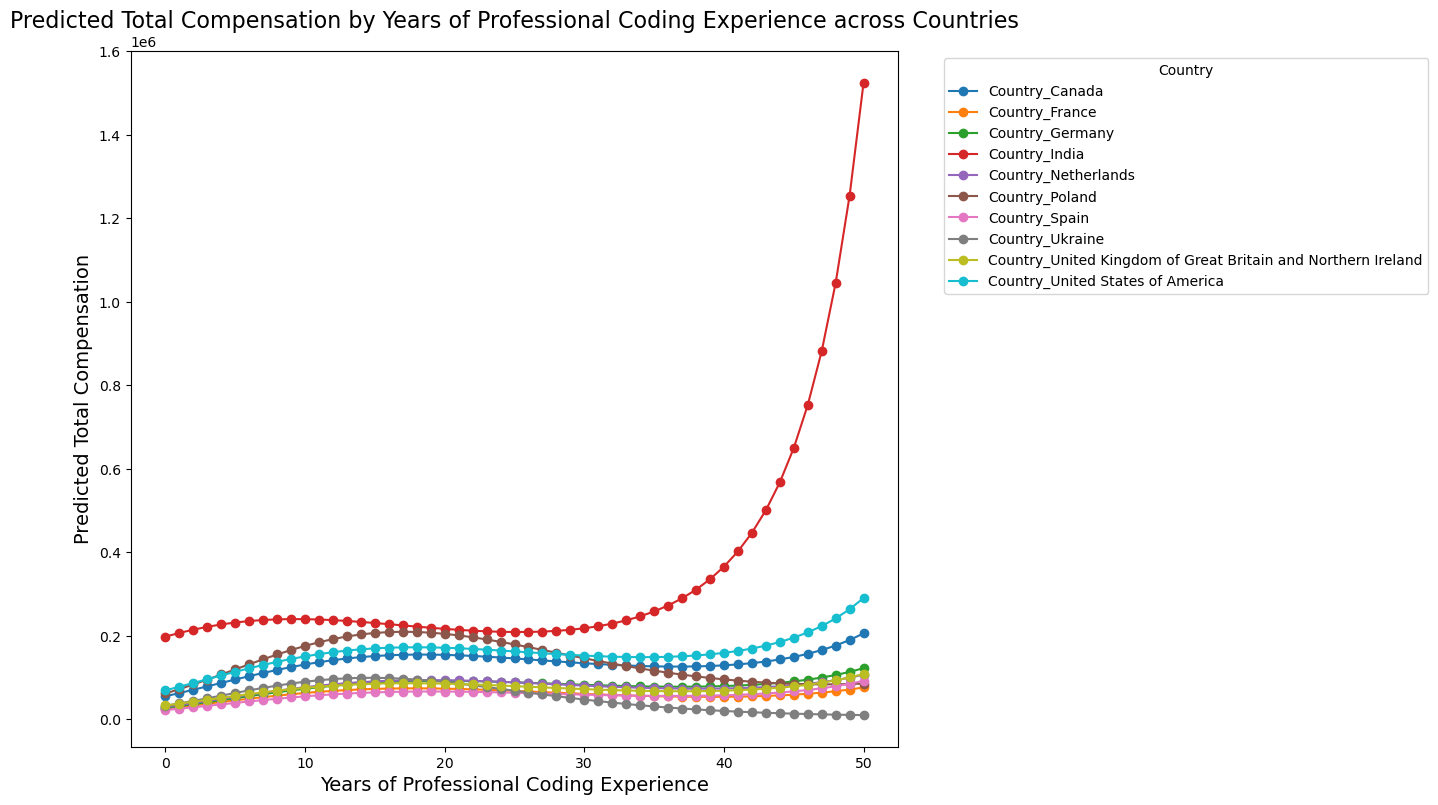

In [19]:
import matplotlib.pyplot as plt

# Add predictions to the input DataFrame
input_df['Predicted_CompTotal'] = predictions_original_scale

# Plotting
plt.figure(figsize=(14, 8))

for country in country_flags:
    subset = input_df[input_df[country] == 1]
    plt.plot(subset['YearsCodePro'], subset['Predicted_CompTotal'], marker='o', label=country)

plt.title('Predicted Total Compensation by Years of Professional Coding Experience across Countries', fontsize=16)
plt.xlabel('Years of Professional Coding Experience', fontsize=14)
plt.ylabel('Predicted Total Compensation', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

### Conclusion and Review

The relationship between years of professional coding experience and total compensation across the top 10 countries reveals some interesting patterns. Our model achieved a Mean Squared Error of **0.3486** and an R-squared score of **0.4541**, indicating that approximately 45% of the variance in total compensation can be explained by the features in the model. This suggests a moderately strong relationship between the predictors and the compensation values.

### Key Findings:
1. **Years of Professional Coding Experience**: This variable shows a clear positive correlation with compensation, with the coefficient of **1.69** indicating a significant impact on the total compensation, which aligns with industry expectations that more experienced developers tend to earn higher salaries.
   
2. **Country-Specific Impact**: While most countries did not show significant deviations in compensation based on the model, **India** displayed a noticeable pattern. From 30 to 50 years of coding experience, there is a **significant spike** in predicted compensation values. This might be due to local economic factors, seniority, or a niche in high-demand expertise. This anomaly is worth investigating further to determine if it reflects real-world trends or possible data artifacts.

3. **Statistical Significance**: Many of the coefficients for individual countries, including interactions between years of coding experience and countries, do not show statistical significance based on the p-values. However, this doesn't undermine the broad relationship between experience and salary, especially as shown in the countries with clearer trends like India.

### Final Thoughts:
While the model provides useful insights, the moderate R-squared score suggests there are other influential factors on developer salaries that are not captured here, such as company size, industry, or the specific technologies used. The spike in compensation for Indian developers with 30-50 years of experience requires deeper exploration to confirm its accuracy and understand the underlying causes.

